In [2]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import numpy as np
import matplotlib.pyplot as plt

In [3]:
(X_train, y_train), (X_test, y_test) = datasets.cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


In [4]:
X_test.shape

(10000, 32, 32, 3)

In [5]:
X_train.shape

(50000, 32, 32, 3)

In [6]:
y_train.shape

(50000, 1)

In [7]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [8]:
y_train = y_train.reshape(-1,1)
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [9]:
y_test = y_test.reshape(-1,)

In [10]:
classes = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

In [11]:
def plot_sample(X, y, index):
    plt.figure(figsize=(15,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

In [15]:
def plot_sample(X, y, index):
    plt.figure(figsize=(15,2))
    plt.imshow(X[index])
    # Extract the integer value from the array using item()
    plt.xlabel(classes[y[index].item()])

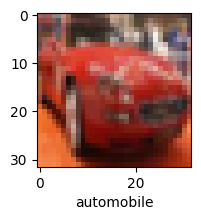

In [16]:
plot_sample(X_train, y_train, 5)

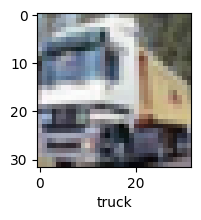

In [21]:
plot_sample(X_train, y_train, 1)

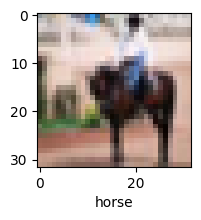

In [22]:
plot_sample(X_train, y_train, 11)

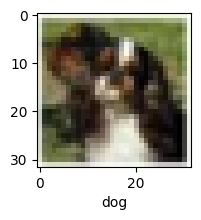

In [23]:
plot_sample(X_train, y_train, 500)

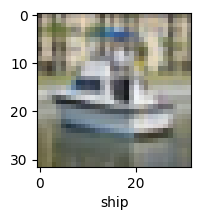

In [24]:
plot_sample(X_train, y_train, 501)

In [25]:
X_train = X_train / 255.0
X_test = X_test / 255.0

In [27]:
from tensorflow.keras.models import Sequential

In [31]:
# Import Sequential correctly
from tensorflow.keras.models import Sequential

ann = Sequential([
    layers.Flatten(input_shape=(32,32,3)),
    layers.Dense(3000, activation='relu'),
    layers.Dense(1000, activation='relu'),
    layers.Dense(10, activation='softmax')
])

ann.compile(optimizer = 'SGD', # Corrected optimizer name
            loss= 'sparse_categorical_crossentropy', # Corrected loss function name
            metrics = ['accuracy'])

ann.fit(X_train, y_train, epochs=5)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 144s 91ms/step - accuracy: 0.3055 - loss: 1.9257
Epoch 2/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 199s 90ms/step - accuracy: 0.4194 - loss: 1.6440
Epoch 3/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 142s 89ms/step - accuracy: 0.4535 - loss: 1.5442
Epoch 4/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 145s 93ms/step - accuracy: 0.4775 - loss: 1.4835
Epoch 5/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 139s 89ms/step - accuracy: 0.4974 - loss: 1.4341


In [32]:
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np
y_pred = ann.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print('classification report: \n', classification_report(y_test, y_pred_classes))

313/313 ━━━━━━━━━━━━━━━━━━━━ 10s 31ms/step
classification report: 
               precision    recall  f1-score   support

           0       0.43      0.68      0.53      1000
           1       0.68      0.52      0.59      1000
           2       0.31      0.42      0.36      1000
           3       0.40      0.24      0.30      1000
           4       0.48      0.24      0.32      1000
           5       0.42      0.33      0.37      1000
           6       0.37      0.80      0.51      1000
           7       0.71      0.34      0.46      1000
           8       0.57      0.63      0.60      1000
           9       0.65      0.45      0.53      1000

    accuracy                           0.46     10000
   macro avg       0.50      0.46      0.46     10000
weighted avg       0.50      0.46      0.46     10000



In [33]:
import seaborn as sns

<function matplotlib.pyplot.show(close=None, block=None)>

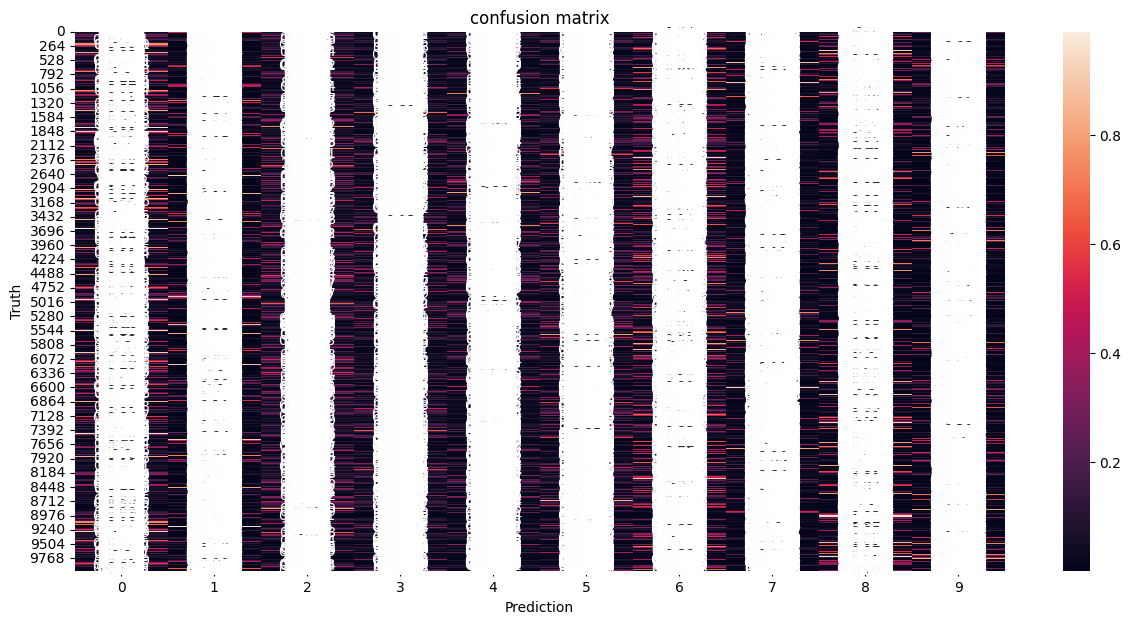

In [36]:
plt.figure(figsize=(15,7))
sns.heatmap(y_pred, annot=True)
plt.xlabel('Prediction')
plt.ylabel('Truth')
plt.title('confusion matrix')
plt.show

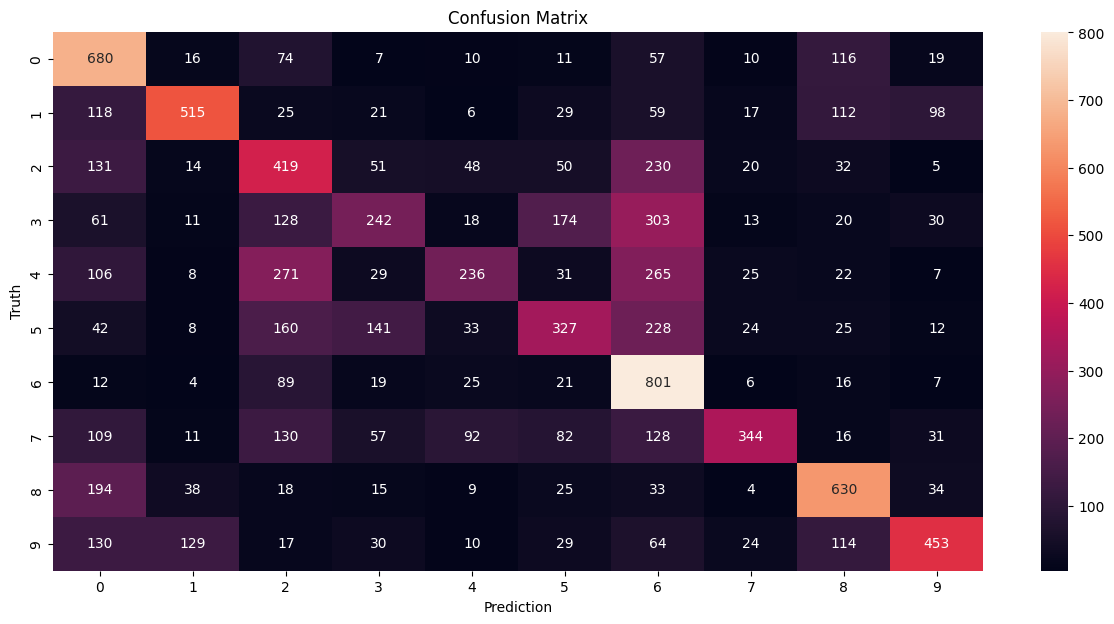

In [35]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# ... (your existing code) ...

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred_classes)

# Plot the confusion matrix using Seaborn
plt.figure(figsize=(15,7))
sns.heatmap(cm, annot=True, fmt='d')  # 'd' format for integers
plt.xlabel('Prediction')
plt.ylabel('Truth')
plt.title('Confusion Matrix')
plt.show()

In [38]:
cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=(32,32,3)),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])
cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
cnn.fit(X_train, y_train, epochs=10, # Changed train_images and train_labels to X_train and y_train
          validation_data=(X_test, y_test)) # Changed test_images and test_labels to X_test and y_test

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 78s 49ms/step - accuracy: 0.3904 - loss: 1.6845 - val_accuracy: 0.5857 - val_loss: 1.1779
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 86s 51ms/step - accuracy: 0.6060 - loss: 1.1294 - val_accuracy: 0.6330 - val_loss: 1.0557
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 78s 50ms/step - accuracy: 0.6553 - loss: 0.9827 - val_accuracy: 0.6511 - val_loss: 0.9986
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 80s 49ms/step - accuracy: 0.6899 - loss: 0.8880 - val_accuracy: 0.6765 - val_loss: 0.9265
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 77s 49ms/step - accuracy: 0.7141 - loss: 0.8209 - val_accuracy: 0.6619 - val_loss: 1.0085
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 98s 63ms/step - accuracy: 0.7415 - loss: 0.7468 - val_accuracy: 0.6878 - val_loss: 0.9398
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 156s 72ms/step - accuracy: 0.7590 - loss: 0.6913 - val_accuracy: 0.7032 - val_loss: 0.8914
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 141s 71ms/step - accuracy: 0.7786

In [39]:
cnn.evaluate(X_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.7053 - loss: 0.9220


[0.9278711676597595, 0.7049999833106995]

In [40]:
y_pred = cnn.predict(X_test)
y_pred[:5]

313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 18ms/step


array([[7.51739591e-02, 8.84470195e-02, 9.86344763e-04, 2.73657739e-01,
        9.66153020e-05, 1.53424397e-01, 2.12847460e-02, 2.39268658e-04,
        3.78925145e-01, 7.76469428e-03],
       [3.09780240e-03, 5.44914901e-01, 1.73260628e-06, 6.77574974e-07,
        6.19235774e-10, 8.28420497e-08, 3.42072681e-08, 4.69402872e-09,
        4.51522917e-01, 4.61796619e-04],
       [2.68543571e-01, 5.16446531e-01, 3.78824235e-03, 3.11841094e-03,
        1.51310625e-04, 1.18948135e-03, 1.43025143e-04, 1.22813822e-03,
        1.83111906e-01, 2.22793203e-02],
       [6.28195703e-01, 6.49423385e-03, 1.28696831e-02, 3.22885142e-04,
        7.04958569e-04, 4.69375209e-06, 4.01774378e-06, 1.73057288e-06,
        3.51394355e-01, 7.81763720e-06],
       [1.82355211e-06, 8.85036843e-06, 1.19486265e-02, 1.60030706e-03,
        9.56866026e-01, 3.42556101e-04, 2.92281099e-02, 2.52194013e-07,
        3.32157970e-06, 1.78671044e-07]], dtype=float32)

In [41]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:5]

[8, 1, 1, 0, 4]

In [42]:
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

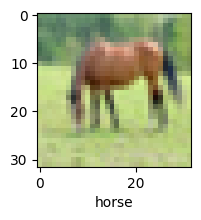

In [43]:
plot_sample(X_test, y_test, 60)

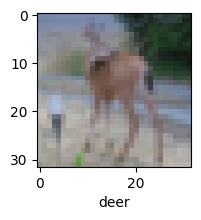

In [44]:
plot_sample(X_test, y_test, 100)

In [47]:
classes[y_classes[4]]

'deer'